<a href="https://colab.research.google.com/github/IImbryk/NMA_MindBigData/blob/work/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from google.colab import drive

In [2]:
drive.mount('/content/drive', force_remount=True)
path_dir = '/content/drive/MyDrive/Data Brain MNIST' 

Mounted at /content/drive


## 1. Load data

[id]: a numeric, only for reference purposes.

[event] id, a integer, used to distinguish the same event captured at different brain locations, used only by multichannel devices (all except MW).

[device]: a 2 character string, to identify the device used to capture the signals, "MW" for MindWave, "EP" for Emotive Epoc, "MU" for Interaxon Muse & "IN" for Emotiv Insight.

[channel]: a string, to indentify the 10/20 brain location of the signal, with possible values:
 
MindWave	"FP1"
EPOC	"AF3, "F7", "F3", "FC5", "T7", "P7", "O1", "O2", "P8", "T8", "FC6", "F4", "F8", "AF4"
Muse	"TP9,"FP1","FP2", "TP10"
Insight	"AF3,"AF4","T7","T8","PZ" 

[code]: a integer, to indentify the digit been thought/seen, with possible values 0,1,2,3,4,5,6,7,8,9 or -1 for random captured signals not related to any of the digits.

[size]: a integer, to identify the size in number of values captured in the 2 seconds of this signal, since the Hz of each device varies, in "theory" the value is close to 512Hz for MW, 128Hz for EP, 220Hz for MU & 128Hz for IN, for each of the 2 seconds.

[data]: a coma separated set of numbers, with the time-series amplitude of the signal, each device uses a different precision to identify the electrical potential captured from the brain: integers in the case of MW & MU or real numbers in the case of EP & IN.


In [4]:
file_name =  ['/MindBigData-EP-v1.0/EP1.01.txt',
              '/MindBigData-IN-v1.06/IN.txt',
              '/MindBigData-MU-v1.0/MU.txt',
              '/MindBigData-MW-v1.0/MW.txt']

In [90]:
#load data
data_2 = pd.read_csv(path_dir+file_name[2], sep="\t", header=None)
data = data_2.copy(deep=True)

In [31]:
def found_min_count_eeg(data, sep_symb=',', num_column = 6):
  """
  to find the minimum number of values EEG
  """
  min_count = 1000
  for row in data[num_column]:
    cur_count = row.count(',')
    min_count = cur_count if cur_count < min_count else min_count
  return min_count

In [32]:
def found_max_count_eeg(data, sep_symb=',', num_column = 6):
  """
  to find the max number of values EEG
  """
  max_count = 0
  for row in data[num_column]:
    cur_count = row.count(',')
    max_count = cur_count if cur_count > max_count else max_count
  return max_count

In [51]:
max_len = found_min_count_eeg(data)
min_len = found_max_count_eeg(data)
print(max_len, min_len)
columns_name = ['eeg'+str(x) for x in range(max_len)]

407 611


In [ ]:
# mat = np.matrix(data[6][0].split(",")[0:max_len])
# for i in range(1, len(data)):
  # mat = np.append(mat,np.matrix(data[6][i].split(",")[0:max_len]), axis=0)
# df_new = pd.concat([data, pd.DataFrame(mat, columns=columns_name)], axis=1)

In [91]:
# переименовать столбцы в соотв. с http://www.mindbigdata.com/opendb/
data = data.rename(columns={0: 'id', 1: 'event',
                        2: 'device', 3:'channel',
                        4: 'code', 5: 'size', 6:'data'})

In [53]:
###Polina 
list_of_names = ['id', 'event', 'device','channel', 'code', 'size', 'data']
df= pd.read_csv('gdrive/My Drive/Data Brain MNIST/MindBigData-MW-v1.0/MW.txt', delimiter = "\t", names = list_of_names)
for i in range(len(df['data'])):
  # df['data'][i] = df['data'][i].split(',') ###uncomment for the first time only 
  for j in range(len(df['data'][i])):
    df['data'][i][j] = int(df['data'][i][j])

,id,event,device,channel,code,size,data,eeg0,eeg1,eeg2,eeg3,eeg4,eeg5,eeg6,eeg7,eeg8,eeg9,eeg10,eeg11,eeg12,eeg13,eeg14,eeg15,eeg16,eeg17,eeg18,eeg19,eeg20,eeg21,eeg22,eeg23,eeg24,eeg25,eeg26,eeg27,eeg28,eeg29,eeg30,eeg31,eeg32,...,eeg401,eeg402,eeg403,eeg404,eeg405,eeg406,eeg407,eeg408,eeg409,eeg410,eeg411,eeg412,eeg413,eeg414,eeg415,eeg416,eeg417,eeg418,eeg419,eeg420,eeg421,eeg422,eeg423,eeg424,eeg425,eeg426,eeg427,eeg428,eeg429,eeg430,eeg431,eeg432,eeg433,eeg434,eeg435,eeg436,eeg437,eeg438,eeg439,eeg440
0,978111,132669,MU,TP9,6,459,"[475, 474, 477, 486, 486, 476, 479, 483, 489, ...",475,474,477,486,486,476,479,483,489,483,482,485,486,483,474,475,484,481,482,478,476,479,487,481,480,479,487,486,471,487,491,488,491,...,511,515,517,521,513,509,527,519,523,521,513,519,530,528,520,518,515,514,506,516,521,522,517,514,506,517,521,524,509,513,521,520,521,514,516,520,519,519,514,515
1,978112,132669,MU,FP1,6,459,"[468, 487, 493, 493, 498, 493, 491, 490, 492, ...",468,487,493,493,498,493,491,490,492,487,483,488,489,493,494,489,488,481,492,489,483,488,491,490,491,487,487,490,481,495,493,495,497,...,510,511,511,514,514,506,508,504,515,510,507,505,511,515,513,514,509,506,502,512,509,508,506,502,503,510,516,513,509,507,506,511,509,506,511,515,507,512,511,506
2,978113,132669,MU,FP2,6,459,"482,475,490,500,485,470,470,482,490,484,478,48...",482,475,490,500,485,470,470,482,490,484,478,480,486,490,482,473,481,488,477,480,486,487,486,484,483,479,484,483,466,482,486,484,482,...,499,503,497,502,500,499,504,508,504,505,496,508,506,497,500,499,503,500,498,524,516,510,508,503,502,503,507,500,492,506,505,502,498,504,498,508,508,508,502,499
3,978114,132669,MU,TP10,6,459,"470,470,478,489,487,475,469,478,488,483,474,48...",470,470,478,489,487,475,469,478,488,483,474,480,487,484,474,471,481,484,485,479,461,471,493,485,473,475,481,485,467,468,481,488,484,...,507,503,521,528,514,506,519,527,522,517,502,511,533,522,506,504,518,526,505,507,526,532,523,506,514,509,529,525,507,509,517,529,515,503,514,528,518,517,508,514
4,978115,132670,MU,TP9,7,493,"506,499,495,491,492,507,496,500,498,496,499,50...",506,499,495,491,492,507,496,500,498,496,499,500,496,502,506,504,500,486,505,500,497,496,497,502,498,497,498,502,501,498,503,499,502,...,523,511,505,509,515,509,509,515,529,525,529,520,520,530,536,530,527,534,530,531,528,522,528,533,537,530,525,533,533,528,529,529,527,530,526,532,532,525,521,536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,978205,132692,MU,FP2,8,476,"553,495,496,506,503,500,510,505,494,491,485,48...",553,495,496,506,503,500,510,505,494,491,485,489,494,494,481,464,471,553,480,479,491,486,470,477,471,476,476,477,485,477,483,480,464,...,503,506,500,501,499,499,508,505,502,497,502,495,493,503,513,510,513,505,499,504,493,487,486,481,504,479,470,478,477,476,476,477,479,485,483,476,476,473,488,504
95,978206,132692,MU,TP10,8,476,"505,480,479,485,487,478,478,485,487,486,482,48...",505,480,479,485,487,478,478,485,487,486,482,489,493,491,488,482,490,505,488,482,484,494,496,494,485,482,481,482,479,476,485,489,489,...,514,521,525,519,516,512,530,532,524,514,511,517,523,527,528,515,521,508,508,514,518,523,508,509,522,519,512,513,515,511,517,516,504,513,522,522,510,508,515,523
96,978207,132693,MU,TP9,1,476,"501,513,509,500,504,495,499,499,493,497,503,50...",501,513,509,500,504,495,499,499,493,497,503,501,501,497,500,502,500,497,504,496,498,498,495,494,498,497,495,498,505,504,499,499,498,...,500,507,501,500,493,497,492,512,522,533,533,529,537,539,539,532,529,537,535,533,518,517,514,520,516,527,531,532,532,532,534,531,529,532,530,528,529,529,526,520
97,978208,132693,MU,FP1,1,476,"507,519,519,514,513,513,512,514,510,506,513,51...",507,519,519,514,513,513,512,514,510,506,513,515,515,513,5

In [92]:
for i in range(0, len(data)):
  data['data'][i] = list(map(int, data['data'][i].split(',')))[0:max_len]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


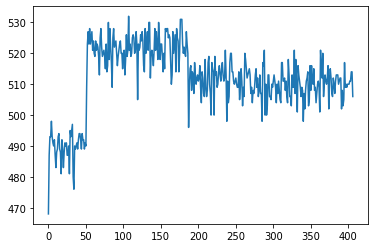

In [95]:
plt.plot(data['data'][1])